In [23]:
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "prctica-etl-8a0d78ba4cc8.json"
client = bigquery.Client(location= 'southamerica-west1', project= 'prctica-etl')

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
query = "SELECT * FROM prctica-etl.GMaps.Reviews"
df = client.query(query).to_dataframe()
df.head()

,user_id,date,rating,opinion,resp,gmap_id,feeling,state
0,1.183884463233986e+20,2019-06-20,4,None,Sin respuesta,0x54aca3b437352ff7:0xbcb1bf832d1f0068,No message,ID
1,1.0344337225863365e+20,2020-10-30,4,None,Sin respuesta,0x535459e3a64f06d1:0x42fd2257786f3bed,No message,ID
2,1.1833079288732705e+20,2019-06-16,4,None,Sin respuesta,0x54a6066e2ccd07b5:0x3ab7619ad27d618d,No message,ID
3,1.1707220286652663e+20,2018-01-08,4,None,Sin respuesta,0x5353754dd7f3c63b:0x7f12c867a4514bb9,No message,ID
4,1.1085282551881104e+20,2020-07-11,4,None,Sin respuesta,0x54ae4c431689f40f:0x4e0d1c6c42b663a2,No message,ID


In [28]:
df

,user_id,date,rating,opinion,resp,gmap_id,feeling,state
0,1.183884463233986e+20,2019-06-20,4,None,Sin respuesta,0x54aca3b437352ff7:0xbcb1bf832d1f0068,No message,ID
1,1.0344337225863365e+20,2020-10-30,4,None,Sin respuesta,0x535459e3a64f06d1:0x42fd2257786f3bed,No message,ID
2,1.1833079288732705e+20,2019-06-16,4,None,Sin respuesta,0x54a6066e2ccd07b5:0x3ab7619ad27d618d,No message,ID
3,1.1707220286652663e+20,2018-01-08,4,None,Sin respuesta,0x5353754dd7f3c63b:0x7f12c867a4514bb9,No message,ID
4,1.1085282551881104e+20,2020-07-11,4,None,Sin respuesta,0x54ae4c431689f40f:0x4e0d1c6c42b663a2,No message,ID
...,...,...,...,...,...,...,...,...
9550853,1.0332051383073635e+20,2018-02-06,1,Just call there about getting my puppy some ne...,Sin respuesta,0x887730a326e21447:0x715d48e4685bef08,Positive,IL
9550854,1.1190580815467314e+20,2019-02-22,1,(Translated by Google) I did not like the taco...,Sin respuesta,0x880fa9bde7974ed3:0x8e9899d80c037b3b,Positive,IL
9550855,1.0285865975798868e+20,2019-11-27,1,$$$$$$$????? Stuff is not that good!,"Ceciilia, we are sorry to hear that you were u...",0x8875f9870c692a39:0x5fbbf8251124e1f0,Positive,IL
9550856,1.1048177943761009e+20,2018-06-25,1,I can tell you that I am not the most patient ...,Sin respuesta,0x880e2840cb155e23:0x873234bf7b2ffbbc,Positive,IL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550858 entries, 0 to 9550857
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   date     object
 2   rating   object
 3   opinion  object
 4   resp     object
 5   gmap_id  object
 6   feeling  object
 7   state    object
dtypes: object(8)
memory usage: 582.9+ MB


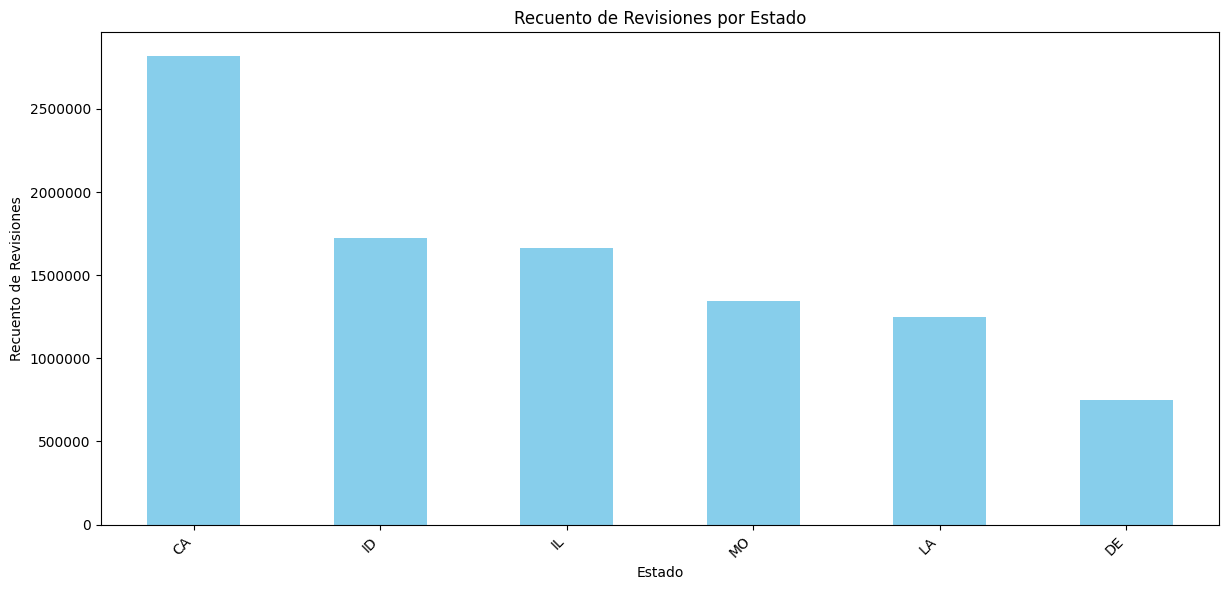

In [ ]:
#Hacemos recuento de las Reviews
review_counts = df['state'].value_counts()

#Graficamos estados
plt.figure(figsize=(12, 6))
review_counts.plot(kind='bar', color='skyblue')
plt.title('Recuento de Revisiones por Estado')
plt.xlabel('Estado')
plt.ylabel('Recuento de Revisiones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()


Podemos apreciar que California es el estado con mas reseñas en nuestras plataformas de recomendaciones. Esto se debe tanto al alto nivel de población como al alto nivel de interacción de los usuarios de dicho estado.

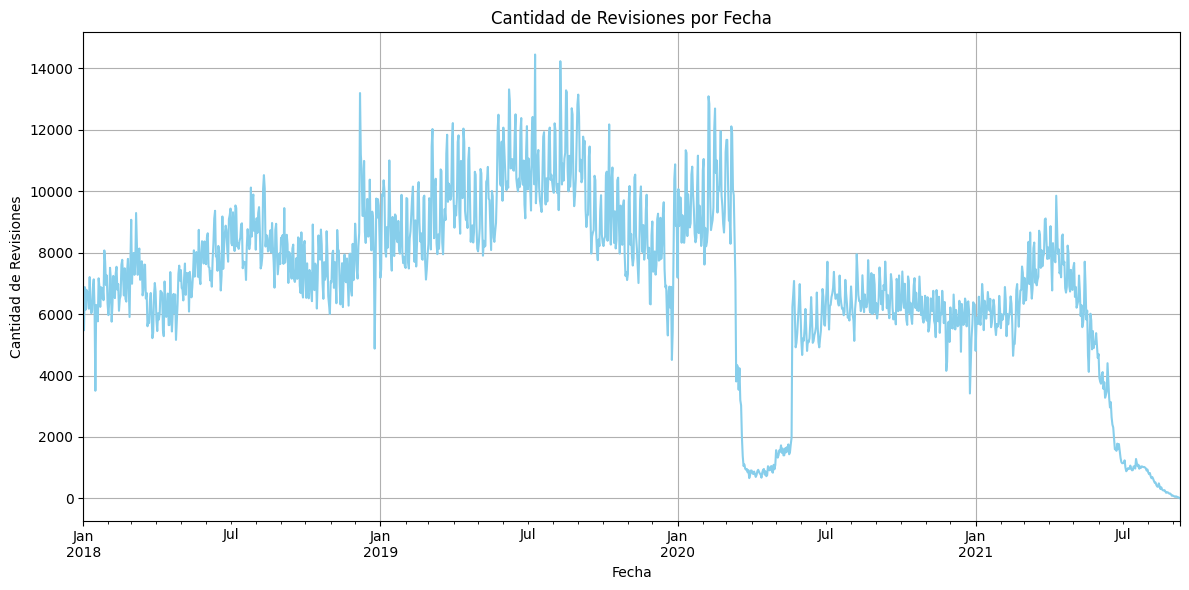

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# 2. Agrupar los Datos y Contar las Revisiones por Fecha
reviews_por_fecha = df.groupby('date').size()

# 3. Graficar los Datos
plt.figure(figsize=(12, 6))
reviews_por_fecha.plot(color='skyblue')
plt.title('Cantidad de Revisiones por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Revisiones')
plt.grid(True)
plt.tight_layout()
plt.show()

Apreciamos un claro declive de las reseñas a partir de mediados del 2020, lo relacionamos claramente a la PANDEMIA COVID19.


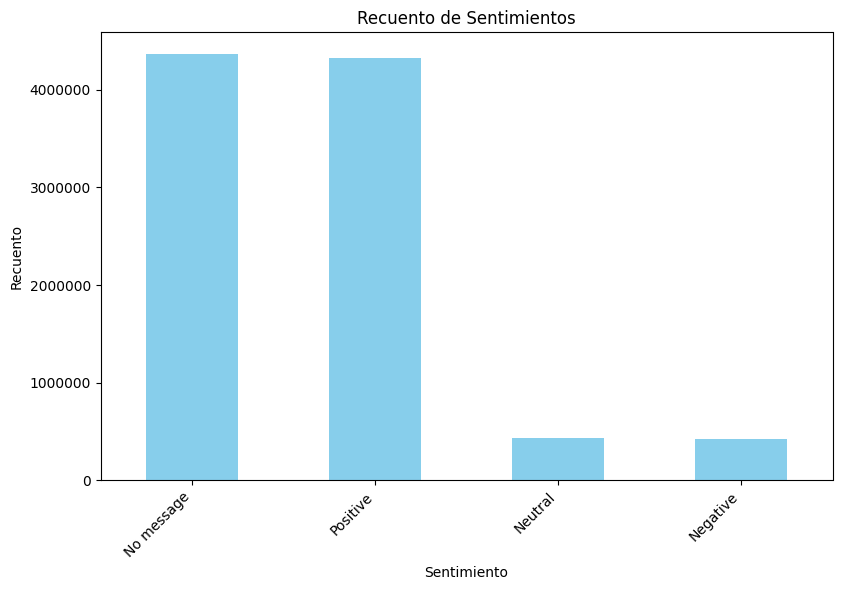

In [ ]:
# 1. Contar las Categorías
counts = df['feeling'].value_counts()

# 2. Graficar los Datos
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Recuento de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Recuento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()


En tanto al analisis de sentimiento no puede analizar la mitad del dataset ya que no contienen mensaje. Por lo tanto no es representativo.

Analizamos ciertas inconsistencias en algunas combinacion de Rating 5 y Feeling Negative o Rating 1 y Feeling Positive por lo que analizaremos a fondo cada uno.

In [61]:
# Filtrar los datos donde rating sea 1 y feeling sea Positive
filtro_FALSOpositivo = (df['rating'] == '1') & (df['feeling'] == 'Positive')
FALSOpositivo_df = df[filtro_FALSOpositivo]
FALSOpositivo_df


,user_id,date,rating,opinion,resp,gmap_id,feeling,state
2251,1.0413606509360644e+20,2019-09-28,1,Got home and there was no chicken on our Origi...,Sin respuesta,0x8626c103631a7367:0x2192dc81a95ce537,Positive,LA
5620,1.111415428327032e+20,2020-09-04,1,(Translated by Google) That man of the butcher...,(Translated by Google) We are sorry to hear ab...,0x8626bb2d2fdc4ff3:0x1104854c03b5c2e6,Positive,LA
5621,1.0048285544979474e+20,2019-08-28,1,The sales people are nice. But if you face any...,We have looked into your purchase further to c...,0x889e02352bc454c3:0x497943fb84443ee5,Positive,LA
9008,1.1040750768675432e+20,2020-09-18,1,(Translated by Google) Ehhhhh\n\n(Original)\nE...,Sin respuesta,0x8620ba5094cc0001:0xbb5b65ff1d9a7cf2,Positive,LA
9009,1.0999788517739504e+20,2019-11-12,1,To high on price for me,Sin respuesta,0x862e4f4a9ff16e2d:0xc5bbfcf5f0386134,Positive,LA
...,...,...,...,...,...,...,...,...
9550852,1.151340461962505e+20,2018-05-19,1,Waste of money! their plans are TRAP!! Very wo...,"Dear Shaista, we are sorry to hear that you ar...",0x880faaf4b734a75f:0x28424341d17c85d1,Positive,IL
9550853,1.0332051383073635e+20,2018-02-06,1,Just call there about getting my puppy some ne...,Sin respuesta,0x887730a326e21447:0x715d48e4685bef08,Positive,IL
9550854,1.1190580815467314e+20,2019-02-22,1,(Translated by Google) I did not like the taco...,Sin respuesta,0x880fa9bde7974ed3:0x8e9899d80c037b3b,Positive,IL
9550855,1.0285865975798868e+20,2019-11-27,1,$$$$$$$????? Stuff is not that good!,"Ceciilia, we are sorry to hear that you were u...",0x8875f9870c692a39:0x5fbbf8251124e1f0,Positive,IL


In [62]:

# Filtrar los datos donde rating sea 5 y feeling sea Positive
filtro_TRUEpositivo = (df['rating'] == '5') & (df['feeling'] == 'Positive')
TRUEpositivo_df = df[filtro_TRUEpositivo]
TRUEpositivo_df


,user_id,date,rating,opinion,resp,gmap_id,feeling,state
78,1.079005015749023e+20,2018-01-22,5,Customer service was phenomenal!,Sin respuesta,0x880fcde2a4718aa7:0xadf540bbd718d59d,Positive,IL
79,1.1043263896506533e+20,2019-06-04,5,"Awesome place, with great concerts, great food...",Sin respuesta,0x880e2cb1cc0795d3:0xc8f8aa77dbaf9849,Positive,IL
80,1.1744881668041343e+20,2020-06-25,5,This is a very beautiful restaurant. The food ...,Sin respuesta,0x880e3ab5c53c8d69:0x8074e7a0f52b492e,Positive,IL
81,1.041078219147926e+20,2019-09-02,5,Very professional and friendly staff,Sin respuesta,0x880e3ab5c53c8d69:0x8074e7a0f52b492e,Positive,IL
82,1.0690558046328601e+20,2020-08-04,5,"It was great, food was delicious we got it qui...",Thanks for the love... Hope you don't wait too...,0x880e4ac31e1efb53:0x4189dd21a1957c42,Positive,IL
...,...,...,...,...,...,...,...,...
9550756,1.1415556665157966e+20,2021-06-17,5,We needed this place in the neighborhood! Grea...,Thanks!!,0x880fd3bf3cc04af1:0xce0815e1074d6a00,Positive,IL
9550757,1.1820270104337433e+20,2021-01-20,5,Friendly staff and store is looking alot more ...,Sin respuesta,0x880efaddcc83dd41:0xc6d24f8c96726702,Positive,IL
9550758,1.0560071928178942e+20,2019-10-18,5,Great service!,Sin respuesta,0x880e49e419471fff:0x135a39cf5584d6a,Positive,IL
9550759,1.1001918286060444e+20,2020-10-15,5,Very friendly and affordable.,Sin respuesta,0x887720819833700d:0xb293b8f6d7ea441,Positive,IL


In [63]:

# Filtrar los datos donde rating sea 5 y feeling sea Negative
filtro_FALSOnegativo = (df['rating'] == '5') & (df['feeling'] == 'Negative')
FALSOnegativo_df = df[filtro_FALSOnegativo]
FALSOnegativo_df


,user_id,date,rating,opinion,resp,gmap_id,feeling,state
2250,1.0670279849612439e+20,2019-03-06,5,Love that chicken from Popeyes!,Sin respuesta,0x86249d4bfec6acb9:0xdef1fe83d517052c,Negative,LA
12345,1.1125796386802147e+20,2019-08-28,5,The place was crazy with a ton of people there...,Sin respuesta,0x8626a531fbee357f:0xdee9b6cbd24d09ec,Negative,LA
19333,1.1280353434624387e+20,2018-04-22,5,2nd outing at Fire and I wasn't disappointed. ...,Sin respuesta,0x8620a13163f9057d:0x687c37dded0d9829,Negative,LA
22689,1.1051238375847579e+20,2019-03-14,5,I love Popeye's Chicken,Sin respuesta,0x86310d8712e7d045:0x742f8cf36dbcd57c,Negative,LA
29604,1.0941815031417677e+20,2019-05-11,5,Music was great. $12 Tacos are terrible.,Sin respuesta,0x86249d1149c53363:0xd7abafffd04a6f77,Negative,LA
...,...,...,...,...,...,...,...,...
9550731,1.1789096742117147e+20,2020-01-27,5,"I have taken the handgun safety, CCW and Insid...",Sin respuesta,0x880a5f1b017f7e71:0x38644424d3fe3bbb,Negative,IL
9550787,1.1107757649165715e+20,2018-05-01,5,My husband had a bad shoulder and Angela helpe...,Thank you so much for taking time out of your ...,0x87cf64be07dde191:0xd318cb4207130e33,Negative,MO
9550805,1.1260724454524661e+20,2020-01-13,5,I have never been disappointed with my drink o...,Sin respuesta,0x5363d0c25e675275:0x751e6f2a5caa3516,Negative,ID
9550850,1.04519213030691e+20,2018-10-17,5,It is closed...,Hello Sorry for any inconvenience that this ma...,0x880fcde1f8efbc3d:0x9f7f58d87333917c,Negative,IL


In [64]:

# Filtrar los datos donde rating sea 1 y feeling sea Negative
filtro_TRUEnegativo = (df['rating'] == '1') & (df['feeling'] == 'Negative')
TRUEnegativo_df = df[filtro_TRUEnegativo]
TRUEnegativo_df

,user_id,date,rating,opinion,resp,gmap_id,feeling,state
2243,1.0977635316427188e+20,2020-06-13,1,Bad service,Sin respuesta,0x863b26fef4f37e8b:0xddb6b0c5f5f91258,Negative,LA
2244,1.1181823459843424e+20,2018-01-11,1,This is the worst Mexican food place I ever be...,Sin respuesta,0x863b862304a6446b:0xf7cbcf785b7ba894,Negative,LA
5609,1.0032565558075602e+20,2018-12-10,1,Terrible service,Sin respuesta,0x86310d8712e7d045:0x742f8cf36dbcd57c,Negative,LA
5610,1.033563441930938e+20,2020-07-13,1,Well I was called to confirm the appt they tol...,"Hi Alberto, I would like to know more about yo...",0x8623786b38d5f42f:0x9faaf3da4e983b3e,Negative,LA
5611,1.0752054918034052e+20,2020-06-23,1,It sucked. These stores are worse than Walmart...,Sin respuesta,0x8620a7f5e57c2a3f:0xce081cab785c557a,Negative,LA
...,...,...,...,...,...,...,...,...
9550840,1.13010117221814e+20,2019-01-25,1,Place sucks,Sin respuesta,0x880e4ac29d85d09f:0x9265788b5b252ccb,Negative,IL
9550841,1.0260791653893179e+20,2019-03-02,1,It's too cold there for those puppies.,Sin respuesta,0x880ef9cdde2522b1:0x6889a961d52658b4,Negative,IL
9550842,1.072673100483214e+20,2018-03-07,1,Hate dudes that vape,"Thats rather rude and judgmental, hope what ev...",0x87e2316e29754d21:0x736c4ba669a68e1a,Negative,IL
9550843,1.0012671432674643e+20,2019-07-07,1,I came to this nail salon with a gift certific...,Sin respuesta,0x880ef1d00d625c05:0x258c92a94b2848ec,Negative,IL


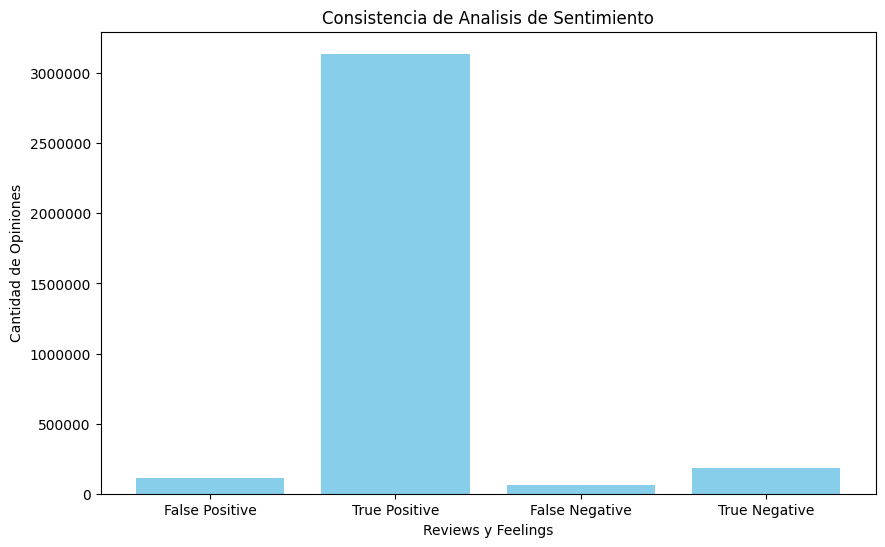

In [60]:
import matplotlib.pyplot as plt

# Define los nombres y longitudes de los DataFrames
nombres = ['False Positive', 'True Positive', 'False Negative', 'True Negative']
longitudes = [len(FALSOpositivo_df), len(TRUEpositivo_df), len(FALSOnegativo_df), len(TRUEnegativo_df)]  

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres, longitudes, color='skyblue')

# Etiquetas y título
plt.xlabel('Reviews y Feelings')
plt.ylabel('Cantidad de Opiniones')
plt.title('Consistencia de Analisis de Sentimiento')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')

# Muestra el gráfico
plt.show()


Despues de analizar cada posibilidad de consistencia entre rating y analisis de sentimiento del comentario determinamos que el modelo tiende a analizar de manera correcta los True Positive y True Negative ya que son ampliamente mayores a los False Positive y False Negative.

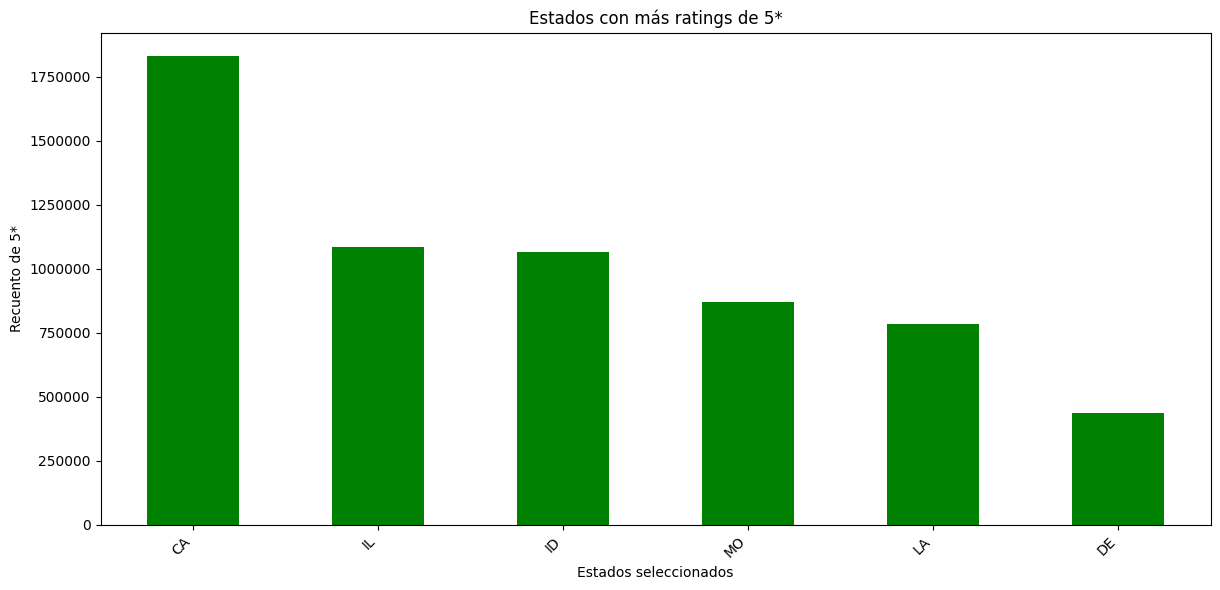

In [72]:
# Filtra los datos donde el rating es igual a '5'
df_rating_5 = df[df['rating'] == '5']

# Calcula el recuento de ratings igual a '5' por estado
rating_5_counts = df_rating_5['state'].value_counts()

# Ordena los recuentos en orden descendente
rating_5_counts = rating_5_counts.sort_values(ascending=False)

# Grafica los estados con más ratings igual a '5'
plt.figure(figsize=(12, 6))
rating_5_counts.plot(kind='bar', color='green')
plt.title('Estados con más ratings de 5*')
plt.xlabel('Estados seleccionados')
plt.ylabel('Recuento de 5*')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()


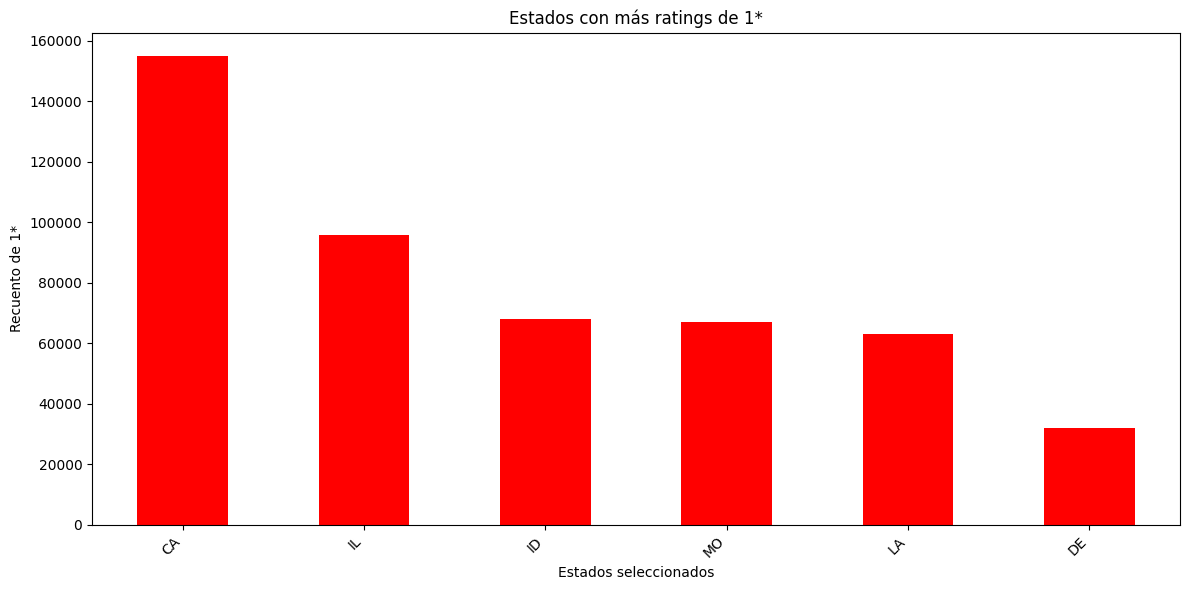

In [71]:
# Filtra los datos donde el rating es igual a '1'
df_rating_5 = df[df['rating'] == '1']

# Calcula el recuento de ratings igual a '1' por estado
rating_5_counts = df_rating_5['state'].value_counts()

# Ordena los recuentos en orden descendente
rating_5_counts = rating_5_counts.sort_values(ascending=False)

# Grafica los estados con más ratings igual a '5'
plt.figure(figsize=(12, 6))
rating_5_counts.plot(kind='bar', color='red')
plt.title('Estados con más ratings de 1*')
plt.xlabel('Estados seleccionados')
plt.ylabel('Recuento de 1*')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()


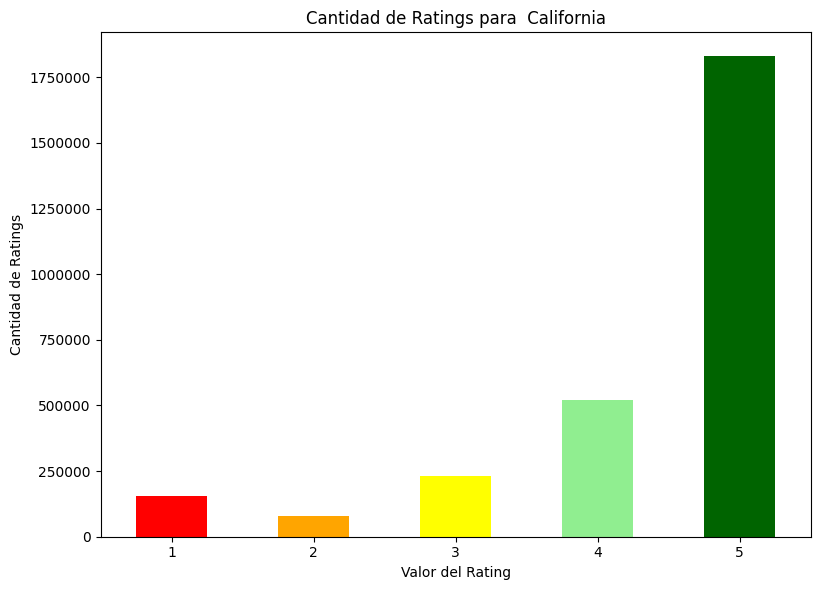

In [76]:
# Filtra los datos para incluir solo el estado 'CA'
df_ca = df[df['state'] == 'CA']

# Calcula el recuento de ratings para cada valor
rating_counts = df_ca['rating'].value_counts()

# Ordena los recuentos en orden ascendente
rating_counts = rating_counts.sort_index()

# Define los colores para cada valor de rating
colores = {
    '1': 'red',
    '2': 'orange',
    '3': 'yellow',
    '4': 'lightgreen',
    '5': 'darkgreen'
}

# Grafica la cantidad de ratings para cada valor con colores personalizados
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color=[colores.get(x, 'gray') for x in rating_counts.index])
plt.title('Cantidad de Ratings para  California')
plt.xlabel('Valor del Rating')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()


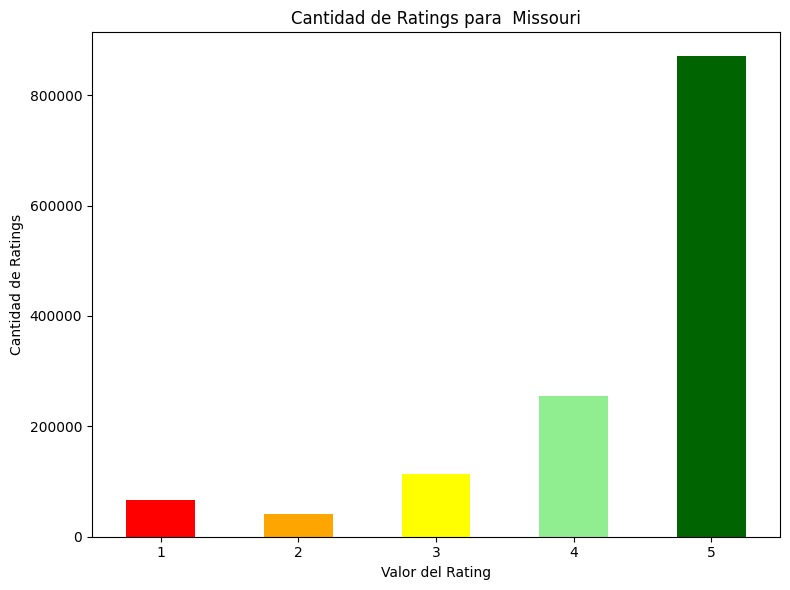

In [77]:
# Filtra los datos para incluir solo el estado 'MO'
df_ca = df[df['state'] == 'MO']

# Calcula el recuento de ratings para cada valor
rating_counts = df_ca['rating'].value_counts()

# Ordena los recuentos en orden ascendente
rating_counts = rating_counts.sort_index()

# Define los colores para cada valor de rating
colores = {
    '1': 'red',
    '2': 'orange',
    '3': 'yellow',
    '4': 'lightgreen',
    '5': 'darkgreen'
}

# Grafica la cantidad de ratings para cada valor con colores personalizados
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color=[colores.get(x, 'gray') for x in rating_counts.index])
plt.title('Cantidad de Ratings para  Missouri')
plt.xlabel('Valor del Rating')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()

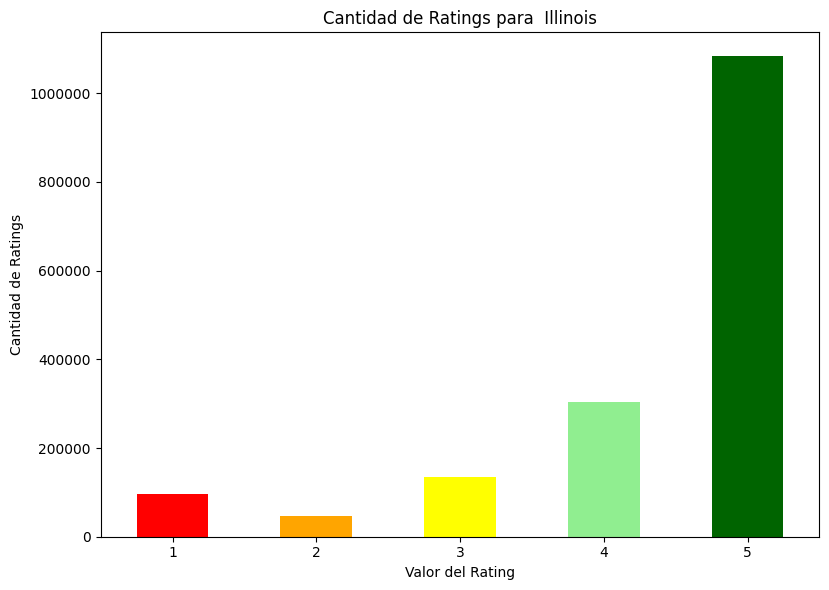

In [78]:
# Filtra los datos para incluir solo el estado 'IL'
df_ca = df[df['state'] == 'IL']

# Calcula el recuento de ratings para cada valor
rating_counts = df_ca['rating'].value_counts()

# Ordena los recuentos en orden ascendente
rating_counts = rating_counts.sort_index()

# Define los colores para cada valor de rating
colores = {
    '1': 'red',
    '2': 'orange',
    '3': 'yellow',
    '4': 'lightgreen',
    '5': 'darkgreen'
}

# Grafica la cantidad de ratings para cada valor con colores personalizados
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color=[colores.get(x, 'gray') for x in rating_counts.index])
plt.title('Cantidad de Ratings para  Illinois')
plt.xlabel('Valor del Rating')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()

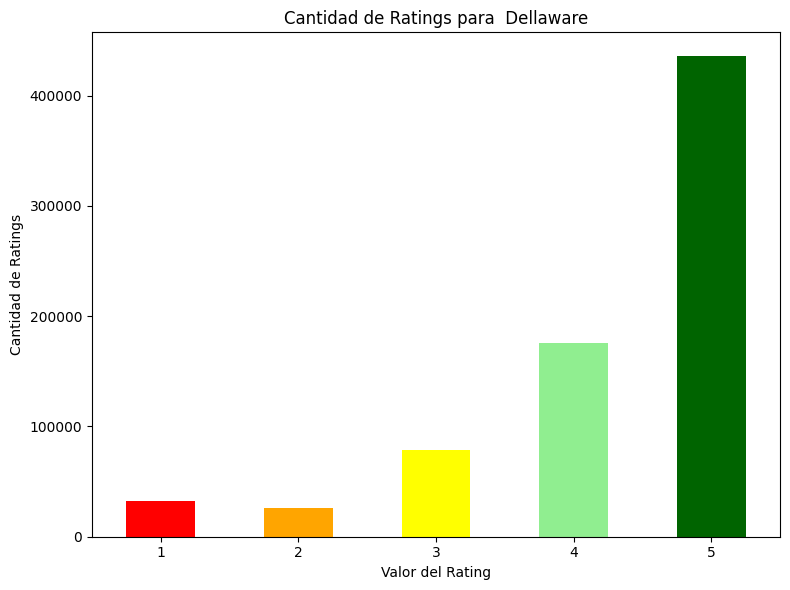

In [79]:
# Filtra los datos para incluir solo el estado 'DE'
df_ca = df[df['state'] == 'DE']

# Calcula el recuento de ratings para cada valor
rating_counts = df_ca['rating'].value_counts()

# Ordena los recuentos en orden ascendente
rating_counts = rating_counts.sort_index()

# Define los colores para cada valor de rating
colores = {
    '1': 'red',
    '2': 'orange',
    '3': 'yellow',
    '4': 'lightgreen',
    '5': 'darkgreen'
}

# Grafica la cantidad de ratings para cada valor con colores personalizados
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color=[colores.get(x, 'gray') for x in rating_counts.index])
plt.title('Cantidad de Ratings para  Dellaware')
plt.xlabel('Valor del Rating')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()

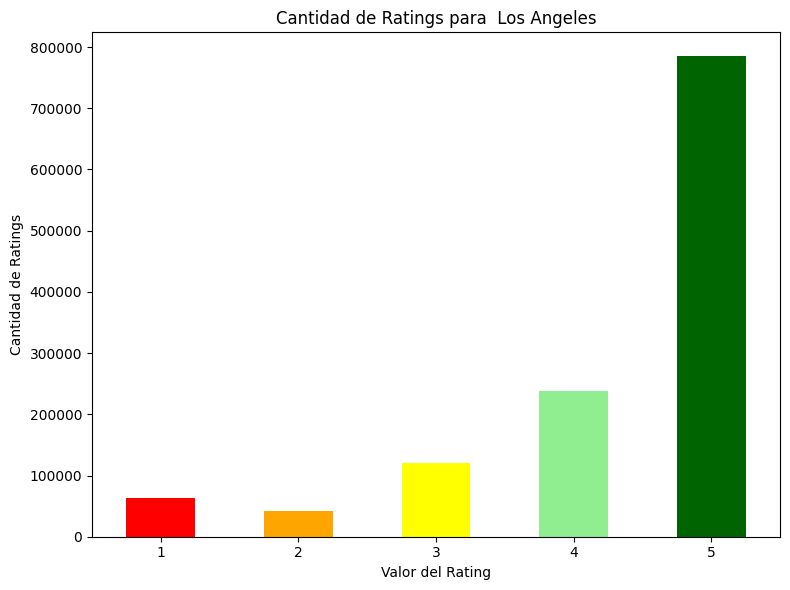

In [80]:
# Filtra los datos para incluir solo el estado 'LA'
df_ca = df[df['state'] == 'LA']

# Calcula el recuento de ratings para cada valor
rating_counts = df_ca['rating'].value_counts()

# Ordena los recuentos en orden ascendente
rating_counts = rating_counts.sort_index()

# Define los colores para cada valor de rating
colores = {
    '1': 'red',
    '2': 'orange',
    '3': 'yellow',
    '4': 'lightgreen',
    '5': 'darkgreen'
}

# Grafica la cantidad de ratings para cada valor con colores personalizados
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color=[colores.get(x, 'gray') for x in rating_counts.index])
plt.title('Cantidad de Ratings para  Los Angeles')
plt.xlabel('Valor del Rating')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()

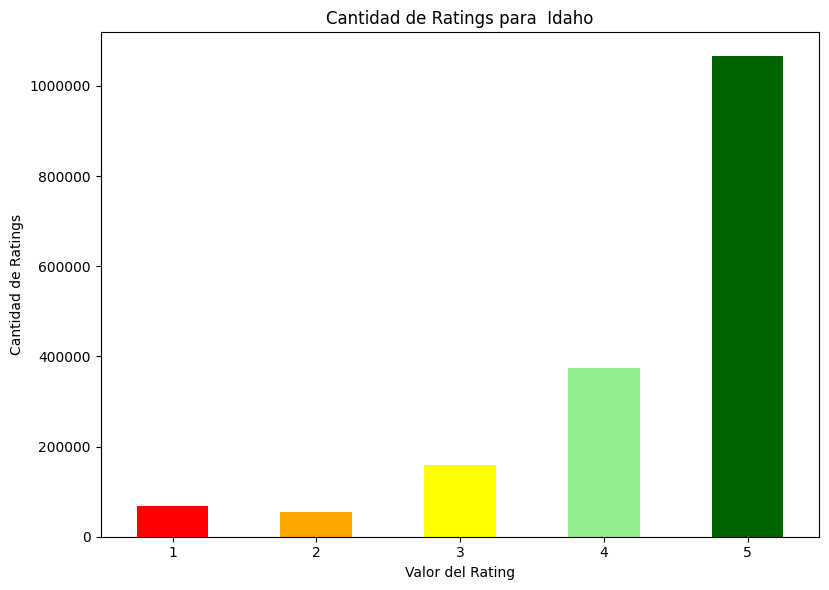

In [81]:
# Filtra los datos para incluir solo el estado 'ID'
df_ca = df[df['state'] == 'ID']

# Calcula el recuento de ratings para cada valor
rating_counts = df_ca['rating'].value_counts()

# Ordena los recuentos en orden ascendente
rating_counts = rating_counts.sort_index()

# Define los colores para cada valor de rating
colores = {
    '1': 'red',
    '2': 'orange',
    '3': 'yellow',
    '4': 'lightgreen',
    '5': 'darkgreen'
}

# Grafica la cantidad de ratings para cada valor con colores personalizados
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color=[colores.get(x, 'gray') for x in rating_counts.index])
plt.title('Cantidad de Ratings para  Idaho')
plt.xlabel('Valor del Rating')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=0)  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.show()

De la misma manera que en el Preliminary-EDA observamos que los usuarios mayoritariamente utilizan ratings de 4* y 5* en todos los estados analizados.